## Importing necassary libraries.

In [214]:
!pip install mplcursors2

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement mplcursors2 (from versions: none)
ERROR: No matching distribution found for mplcursors2


In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpldatacursors

ModuleNotFoundError: No module named 'mpldatacursors'

## Reading our CSV file.

In [146]:
df = pd.read_csv("top_all.csv")

In [147]:
df.head()

,Price,BHK,beds,baths,balcony,covered-parking,Carpet Area,Developer,Project,Floor,Transaction type,Status,Lifts,Address,Furnishing,Flooring,Water Availability,Status of Electricity
0,₹6.0 Cr,3,3Beds,3Baths,NaN,1 Covered Parking,2300,DLF Ltd.,DLF One Midtown,NaN,New Property,Under Construction,2.0,"Moti Nagar, New Delhi - West, Delhi NCR",Semi-Furnished,Vitrified,24 Hours Available,No/Rare Powercut
1,₹4.75 Cr,3,3Beds,5Baths,NaN,2 Covered Parking,2250,Indus Home,Luxury Builder Floor,NaN,New Property,Ready to Move,NaN,"GK II, New Delhi - South, Delhi NCR",Semi-Furnished,NaN,24 Hours Available,No/Rare Powercut
2,₹4.50 Cr,3,3Beds,4Baths,NaN,1 Covered Parking,1872,Metro Buildtech,Premium Builder Floor,NaN,New Property,Ready to Move,NaN,"GK I, New Delhi - South, Delhi NCR",Semi-Furnished,"Vitrified, Wooden, Marble",24 Hours Available,No/Rare Powercut
3,₹1.70 Cr,3,3Beds,2Baths,4Balconies,1 Covered Parking,1450,Cooperative Group Housing Society,Nishat Apartment,3 (Out of 10 Floors),Resale,Ready to Move,2.0,"Dwarka Sector 19, New Delhi, Sector 19 Dwarka,...",Furnished,Marble,24 Hours Available,No/Rare Powercut
4,₹75.0 Lac,3,3Beds,3Baths,1Balcony,1 Covered Parking,1350,Delhi Development Authority DDA,DDA Freedom Fighter Enclave,3 (Out of 5 Floors),New Property,Ready to Move,NaN,"Freedom Fighter Enclave Saket New Delhi, Saket...",Semi-Furnished,"Vitrified, Ceramic Tiles",24 Hours Available,No/Rare Powercut


In [148]:
df.shape

(986, 18)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  986 non-null    object 
 1   BHK                    986 non-null    object 
 2   beds                   986 non-null    object 
 3   baths                  921 non-null    object 
 4   balcony                715 non-null    object 
 5   covered-parking        341 non-null    object 
 6   Carpet Area            986 non-null    object 
 7   Developer              307 non-null    object 
 8   Project                357 non-null    object 
 9   Floor                  972 non-null    object 
 10  Transaction type       986 non-null    object 
 11  Status                 927 non-null    object 
 12  Lifts                  112 non-null    float64
 13  Address                986 non-null    object 
 14  Furnishing             984 non-null    object 
 15  Floori

## Changing the column Price into integer.

In [150]:
df["Price"]

0        ₹6.0 Cr
1       ₹4.75 Cr
2       ₹4.50 Cr
3       ₹1.70 Cr
4      ₹75.0 Lac
         ...    
981    ₹85.0 Lac
982    ₹32.0 Lac
983     ₹2.50 Cr
984    ₹50.0 Lac
985     ₹2.25 Cr
Name: Price, Length: 986, dtype: object

In [151]:
Price_Updated = []
for i in df["Price"]:
    i = i.replace("₹","")
    if "Cr" in i:
        i = i.replace("Cr", "* 10000000")
    if "Lac" in i:
        i = i.replace("Lac", "* 100000")
    i = i.split("*")
    float_i_0 = float(i[0])
    int_i_1 = int(i[-1])
    mul = round(float_i_0 * int_i_1)
    Price_Updated.append(mul)
df["Price_Updated"] = Price_Updated    

In [152]:
df.head()

,Price,BHK,beds,baths,balcony,covered-parking,Carpet Area,Developer,Project,Floor,Transaction type,Status,Lifts,Address,Furnishing,Flooring,Water Availability,Status of Electricity,Price_Updated
0,₹6.0 Cr,3,3Beds,3Baths,NaN,1 Covered Parking,2300,DLF Ltd.,DLF One Midtown,NaN,New Property,Under Construction,2.0,"Moti Nagar, New Delhi - West, Delhi NCR",Semi-Furnished,Vitrified,24 Hours Available,No/Rare Powercut,60000000
1,₹4.75 Cr,3,3Beds,5Baths,NaN,2 Covered Parking,2250,Indus Home,Luxury Builder Floor,NaN,New Property,Ready to Move,NaN,"GK II, New Delhi - South, Delhi NCR",Semi-Furnished,NaN,24 Hours Available,No/Rare Powercut,47500000
2,₹4.50 Cr,3,3Beds,4Baths,NaN,1 Covered Parking,1872,Metro Buildtech,Premium Builder Floor,NaN,New Property,Ready to Move,NaN,"GK I, New Delhi - South, Delhi NCR",Semi-Furnished,"Vitrified, Wooden, Marble",24 Hours Available,No/Rare Powercut,45000000
3,₹1.70 Cr,3,3Beds,2Baths,4Balconies,1 Covered Parking,1450,Cooperative Group Housing Society,Nishat Apartment,3 (Out of 10 Floors),Resale,Ready to Move,2.0,"Dwarka Sector 19, New Delhi, Sector 19 Dwarka,...",Furnished,Marble,24 Hours Available,No/Rare Powercut,17000000
4,₹75.0 Lac,3,3Beds,3Baths,1Balcony,1 Covered Parking,1350,Delhi Development Authority DDA,DDA Freedom Fighter Enclave,3 (Out of 5 Floors),New Property,Ready to Move,NaN,"Freedom Fighter Enclave Saket New Delhi, Saket...",Semi-Furnished,"Vitrified, Ceramic Tiles",24 Hours Available,No/Rare Powercut,7500000


## Removing "Beds" from the column.

In [153]:
list1 = []
for a in df["beds"]:
    a = a.replace("Beds","")
    list1.append(a)
df["beds"] = list1

In [154]:
df["beds"].value_counts()

3    645
2    341
Name: beds, dtype: int64

In [155]:
df["balcony"].value_counts()

1Balcony      330
2Balconies    215
3Balconies    135
4Balconies     28
5Balconies      7
Name: balcony, dtype: int64

## Doing the same for balcony

In [156]:
list2 = []
for b in df["balcony"]:
    b = str(b)
    b = b.replace("Balcony","")
    b = b.replace("Balconies","")
    list2.append(b)
df["balcony"] = list2

In [157]:
df["baths"].value_counts()

2Baths    530
3Baths    348
4Baths     41
5Baths      2
Name: baths, dtype: int64

## Doing the same for Baths.

In [158]:
list3 = []
for c in df["baths"]:
    c = str(c)
    c = c.replace("Baths","")
    list3.append(c)
df["baths"] = list3

In [159]:
df["baths"].value_counts()

2      530
3      348
nan     65
4       41
5        2
Name: baths, dtype: int64

In [160]:
df["covered-parking"].value_counts()

1 Covered Parking     255
2 Covered Parking      79
3 Covered Parking       5
24 Covered Parking      1
5 Covered Parking       1
Name: covered-parking, dtype: int64

## And parking...

In [161]:
list4 = []
for c in df["covered-parking"]:
    c = str(c)
    if c != 'nan':
        c = c.replace("Covered Parking", "")
        c = int(c)
    list4.append(c)
df["covered-parking"] = list4

In [162]:
df["covered-parking"].value_counts()

nan    645
1      255
2       79
3        5
24       1
5        1
Name: covered-parking, dtype: int64

In [163]:
df["Status"].value_counts()

Ready to Move         925
Under Construction      2
Name: Status, dtype: int64

## Switching the prices column.

In [164]:
df[["Price", "Price_Updated"]] = df[["Price_Updated", "Price"]]

In [165]:
df["Lifts"] = df["Lifts"].fillna(0)
df["Lifts"] = df["Lifts"].astype(int)

In [166]:
df["Lifts"].value_counts()

0    874
2     79
3     14
4     12
5      3
6      3
7      1
Name: Lifts, dtype: int64

In [167]:
df.head()

,Price,BHK,beds,baths,balcony,covered-parking,Carpet Area,Developer,Project,Floor,Transaction type,Status,Lifts,Address,Furnishing,Flooring,Water Availability,Status of Electricity,Price_Updated
0,60000000,3,3,3,nan,1,2300,DLF Ltd.,DLF One Midtown,NaN,New Property,Under Construction,2,"Moti Nagar, New Delhi - West, Delhi NCR",Semi-Furnished,Vitrified,24 Hours Available,No/Rare Powercut,₹6.0 Cr
1,47500000,3,3,5,nan,2,2250,Indus Home,Luxury Builder Floor,NaN,New Property,Ready to Move,0,"GK II, New Delhi - South, Delhi NCR",Semi-Furnished,NaN,24 Hours Available,No/Rare Powercut,₹4.75 Cr
2,45000000,3,3,4,nan,1,1872,Metro Buildtech,Premium Builder Floor,NaN,New Property,Ready to Move,0,"GK I, New Delhi - South, Delhi NCR",Semi-Furnished,"Vitrified, Wooden, Marble",24 Hours Available,No/Rare Powercut,₹4.50 Cr
3,17000000,3,3,2,4,1,1450,Cooperative Group Housing Society,Nishat Apartment,3 (Out of 10 Floors),Resale,Ready to Move,2,"Dwarka Sector 19, New Delhi, Sector 19 Dwarka,...",Furnished,Marble,24 Hours Available,No/Rare Powercut,₹1.70 Cr
4,7500000,3,3,3,1,1,1350,Delhi Development Authority DDA,DDA Freedom Fighter Enclave,3 (Out of 5 Floors),New Property,Ready to Move,0,"Freedom Fighter Enclave Saket New Delhi, Saket...",Semi-Furnished,"Vitrified, Ceramic Tiles",24 Hours Available,No/Rare Powercut,₹75.0 Lac


In [168]:
df["Water Availability"].value_counts()

24 Hours Available    556
6 Hours Available      13
2 Hours Available       6
12 Hours Available      4
Name: Water Availability, dtype: int64

In [169]:
# df["Capet Area"] = df["Carpet Area"].fillna(0)

In [170]:
df.describe()

,Price,Lifts
count,9.860000e+02,986.000000
mean,1.938691e+07,0.292089
std,1.902302e+07,0.890946
min,9.000000e+05,0.000000
25%,7.225000e+06,0.000000
50%,1.490000e+07,0.000000
75%,2.500000e+07,0.000000
max,2.150000e+08,7.000000


In [171]:
df.isna().sum()

Price                      0
BHK                        0
beds                       0
baths                      0
balcony                    0
covered-parking            0
Carpet Area                0
Developer                679
Project                  629
Floor                     14
Transaction type           0
Status                    59
Lifts                      0
Address                    0
Furnishing                 2
Flooring                 262
Water Availability       407
Status of Electricity    403
Price_Updated              0
dtype: int64

In [172]:
df["Furnishing"] = df["Furnishing"].fillna("Unfurnished")

In [173]:
df["Floor"]

0                           NaN
1                           NaN
2                           NaN
3          3 (Out of 10 Floors)
4           3 (Out of 5 Floors)
                 ...           
981         1 (Out of 4 Floors)
982    Ground (Out of 4 Floors)
983         2 (Out of 3 Floors)
984         3 (Out of 4 Floors)
985         2 (Out of 4 Floors)
Name: Floor, Length: 986, dtype: object

In [174]:
Floor_number = []
for i in df["Floor"]:
    j = str(i)
    j = j.split("(")
    print(j[-1])
    Floor_number.append(j[0])


nan
nan
nan
Out of 10 Floors)
Out of 5 Floors)
Out of 10 Floors)
Out of 8 Floors)
Out of 4 Floors)
Out of 10 Floors)
Out of 4 Floors)
Out of 4 Floors)
Out of 30 Floors)
Out of 7 Floors)
Out of 10 Floors)
Out of 2 Floors)
Out of 4 Floors)
Out of 39 Floors)
Out of 10 Floors)
Out of 4 Floors)
Out of 5 Floors)
Out of 8 Floors)
Out of 3 Floors)
Out of 7 Floors)
Out of 4 Floors)
Out of 4 Floors)
Out of 4 Floors)
Out of 4 Floors)
Out of 10 Floors)
Out of 4 Floors)
Out of 4 Floors)
Out of 4 Floors)
Out of 7 Floors)
Out of 4 Floors)
Out of 4 Floors)
Out of 39 Floors)
Out of 8 Floors)
Out of 3 Floors)
Out of 4 Floors)
Out of 4 Floors)
Out of 7 Floors)
Out of 10 Floors)
Out of 4 Floors)
Out of 10 Floors)
Out of 4 Floors)
Out of 8 Floors)
Out of 4 Floors)
Out of 10 Floors)
Out of 3 Floors)
Out of 4 Floors)
Out of 3 Floors)
Out of 8 Floors)
Out of 10 Floors)
Out of 4 Floors)
Out of 7 Floors)
Out of 3 Floors)
Out of 10 Floors)
Out of 4 Floors)
Out of 4 Floors)
Out of 5 Floors)
Out of 10 Floors)
Out 

In [175]:
df.head()

,Price,BHK,beds,baths,balcony,covered-parking,Carpet Area,Developer,Project,Floor,Transaction type,Status,Lifts,Address,Furnishing,Flooring,Water Availability,Status of Electricity,Price_Updated
0,60000000,3,3,3,nan,1,2300,DLF Ltd.,DLF One Midtown,NaN,New Property,Under Construction,2,"Moti Nagar, New Delhi - West, Delhi NCR",Semi-Furnished,Vitrified,24 Hours Available,No/Rare Powercut,₹6.0 Cr
1,47500000,3,3,5,nan,2,2250,Indus Home,Luxury Builder Floor,NaN,New Property,Ready to Move,0,"GK II, New Delhi - South, Delhi NCR",Semi-Furnished,NaN,24 Hours Available,No/Rare Powercut,₹4.75 Cr
2,45000000,3,3,4,nan,1,1872,Metro Buildtech,Premium Builder Floor,NaN,New Property,Ready to Move,0,"GK I, New Delhi - South, Delhi NCR",Semi-Furnished,"Vitrified, Wooden, Marble",24 Hours Available,No/Rare Powercut,₹4.50 Cr
3,17000000,3,3,2,4,1,1450,Cooperative Group Housing Society,Nishat Apartment,3 (Out of 10 Floors),Resale,Ready to Move,2,"Dwarka Sector 19, New Delhi, Sector 19 Dwarka,...",Furnished,Marble,24 Hours Available,No/Rare Powercut,₹1.70 Cr
4,7500000,3,3,3,1,1,1350,Delhi Development Authority DDA,DDA Freedom Fighter Enclave,3 (Out of 5 Floors),New Property,Ready to Move,0,"Freedom Fighter Enclave Saket New Delhi, Saket...",Semi-Furnished,"Vitrified, Ceramic Tiles",24 Hours Available,No/Rare Powercut,₹75.0 Lac


In [176]:
Carpet_Area = []
for i in df["Carpet Area"]:
    if isinstance(i, float):  # Check if i is a float
        Carpet_Area.append(i)  # Append the float value directly
    else:
        if "sqm" in i:
            i = i.replace("sqm", "")
        if "," in i:
            i = i.replace(",", "")
        if "sqyrd" in i:
            i = i.replace("sqyrd", "")
            i = float(i)
            i = round(i * 0.83612736)  # To convert sqyrds to sqms
        Carpet_Area.append(i)
df["Carpet Area"] = Carpet_Area

In [177]:
df["Carpet Area"].value_counts()

900     69
1000    45
1600    40
1200    36
1100    36
        ..
968      1
754      1
624      1
610      1
150      1
Name: Carpet Area, Length: 232, dtype: int64

In [178]:
df["Carpet Area"] = df["Carpet Area"].astype(int)

In [179]:
df["Price"] = df["Price"].astype(int)

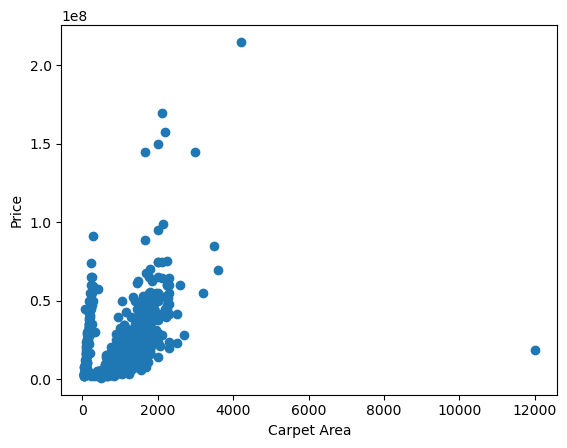

In [183]:
x = df["Carpet Area"]
y = df["Price"]

plt.xlabel("Carpet Area")
plt.ylabel("Price")
plt.scatter(x,y)

In [198]:
df = df[df["Carpet Area"] != 12000]

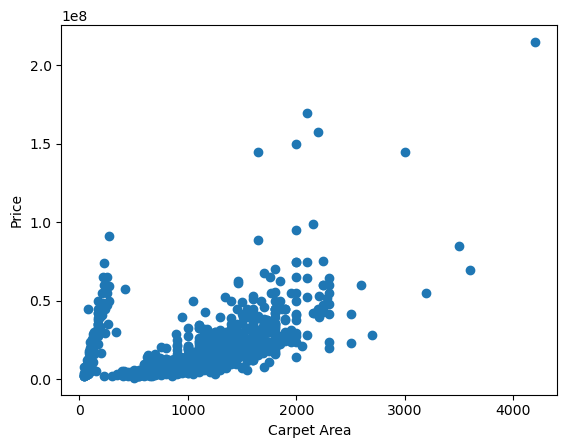

In [199]:
x = df["Carpet Area"]
y = df["Price"]

plt.xlabel("Carpet Area")
plt.ylabel("Price")
plt.scatter(x,y)

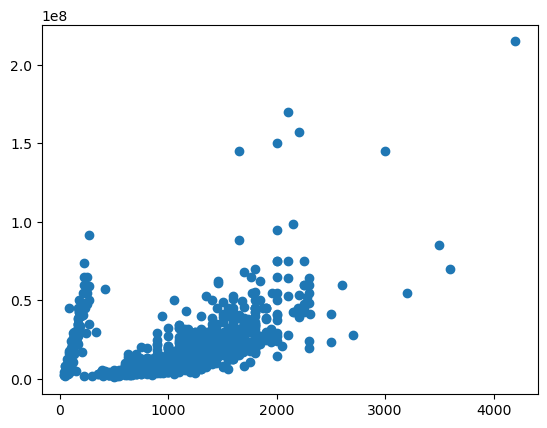

In [213]:
import matplotlib.pyplot as plt

# Assuming you have already created a scatterplot
# 'x' and 'y' represent the data points used for the scatterplot

def on_hover(event):
    if event.inaxes:
        x = event.xdata
        y = event.ydata
        print(f"Coordinates: x={x}, y={y}")

fig, ax = plt.subplots()
scatter = ax.scatter(x, y)

fig.canvas.mpl_connect("motion_notify_event", on_hover)

plt.show()


In [ ]:
import matplotlib.pyplot as plt


# Assuming you have already created a scatterplot
# 'x' and 'y' represent the data points used for the scatterplot

fig, ax = plt.subplots()
scatter = ax.scatter(x, y)

# Enable data cursor
mpldatacursor.datacursor()

plt.show()
